In [ ]:

import os
from google.colab import drive
drive.mount('/content/drive/')
print(os.getcwd())

Mounted at /content/drive/
/content


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers.core import Flatten
from keras.layers import LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.utils import to_categorical
from sklearn import preprocessing
from keras.utils import plot_model
from keras import initializers

import pandas as pd
import numpy as np
import re

In [ ]:
file = pd.read_csv('drive/MyDrive/Colab Notebooks/event_timeline_generation/covid_data_with_tag.csv')
# file.tag.value_counts()

AttributeError: ignored

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/event_timeline_generation/covid_data_similarity_final.csv")
df.head()

# df_pos = df[df.similarity == 1]
# df_neg = df[df.similarity == 0]

,Unnamed: 0,id1,id2,sentence1,sentence2,date1,date2,action1,action2,tag1,tag2,similarity
0,0,0,0,the first case was confirmed in Kerala's Thris...,the first case was confirmed in Kerala's Thris...,"January 30, 2020","January 30, 2020",'confirm','confirm',"'coronavirus case', 'Business Standard', 'News...","'coronavirus case', 'Business Standard', 'News...",1
1,1,0,1,the first case was confirmed in Kerala's Thris...,the second case was reported in Kerala's Alapp...,"January 30, 2020","February 2, 2020",'confirm','report',"'coronavirus case', 'Business Standard', 'News...","'satisfied ERROR', 'satisfied Second', 'Second...",1
2,2,0,2,the first case was confirmed in Kerala's Thris...,the third case was reported in Kerala's Kasara...,"January 30, 2020","February 3, 2020",'confirm','report',"'coronavirus case', 'Business Standard', 'News...","'third case', 'coronavirus case', 'Kasaragod d...",1
3,3,0,3,the first case was confirmed in Kerala's Thris...,the Union Health Ministry reported two more ca...,"January 30, 2020","March 2, 2020",'confirm','report',"'coronavirus case', 'Business Standard', 'News...","'India Timeline', 'SARS-CoV-2 spread', 'sentin...",0
4,4,0,4,the first case was confirmed in Kerala's Thris...,88 people who were in contact with the Hyderab...,"January 30, 2020","March 2, 2020",'confirm','track',"'coronavirus case', 'Business Standard', 'News...","'fellow passengers', 'India News', 'News Timel...",0


In [ ]:
# df_neg = df_neg.sample(frac=0.2)
# df_pos.shape, df_neg.shape

# test_data = df.sample(frac=0.2)
# test_neg = test_data[test_data.similarity == 0]
# test_pos = test_data[test_data.similarity == 1]
# test_neg = test_neg.sample(frac=0.2)
# test = pd.concat([test_pos, test_neg], ignore_index=True)

In [ ]:
# df = pd.concat([df_pos, df_neg], ignore_index=True)
# test.shape

(6037, 6)

In [ ]:
# train_df = pd.read_csv("drive/MyDrive/Colab Notebooks/event_timeline_generation/train.csv")
# test_df = pd.read_csv("drive/MyDrive/Colab Notebooks/event_timeline_generation/test.csv")

# train_df['class'].replace(1, 0,inplace=True)
# train_df['class'].replace(2, 1,inplace=True)

# test_df['class'].replace(1, 0,inplace=True)
# test_df['class'].replace(2, 1,inplace=True)

# train_df['class'].nunique()

2

In [ ]:
from sklearn.model_selection import train_test_split

# df = df.sample(frac=0.2)
X_train, X_test, y_train, y_test = train_test_split(df[['id1', 'id2', 'sentence1', 'sentence2', 'action1', 'action2' 'date1', 'date2', 'tag1', 'tag2']], df.similarity, test_size=0.25, random_state=1000)

In [ ]:
X_test

,id1,id2,sentence1,sentence2,action1,action2,date1,date2,tag1,tag2
18176,129,116,"reported 10,207,871confirmed cases. Daily case...","1,672 backlogged deaths from Maharashtra and D...","'decline', 'report'",'add',"December 28, 2020",June 25,'Daily cases',"'COVID-19 pandemic', 'Delhi Add', 'India regis..."
7825,55,125,"On 14 April, 29 deaths has been reported.[391]...","there were 785,996 Active Cases 2,839,882 reco...","'report', 'confirm'","'overtake', 'register'","April 14, 2020","September 1, 2020","'positive cases', '| Cities', 'new cases', 'In...","'active cases', 'BBC News', 'Covid crisis', 'N..."
4659,33,39,"On 26 March, a 65-year-old man from Srinagar i...",Delhi's Nizamuddin emerges as coronavirus hotspot,"'test', 'report', 'confirm'",'emerge',"March 26, 2020","March 31, 2020","'21-year-old woman', '39-year-old man', 'trave...","'Nizamuddin emerges', 'coronavirus hotspot', '..."
18357,131,17,"India reported 10,667,736 confirmed cases. Da...","a 76-year-old man from Kalaburgi, Karnataka wh...","'report', 'continue'","'quarantine', 'transmit', 'test'","January 25, 2021","March 12, 2020","'daily cases', '| Reuters', 'wave worsens', 's...","'Uttar Pradesh', 'travel history', 'Andhra Pra..."
16119,115,19,274 deaths and 9985 cases were reported.,In Maharashtra two people in Yavatmal with tra...,'report',"'test', 'detect'",June 9,"March 14, 2020","'India records', 'COVID-19 cases', 'new COVID-...","'travel history', 'Weather Channel', 'Deccan H..."
...,...,...,...,...,...,...,...,...,...,...
3972,28,52,"On 23 March, a 55-year-old man from Kolkata, W...","On 11 April, 16-year-old tested positive in Ch...","'die', 'report'","'recover', 'report', 'confirm'","March 23, 2020","April 11, 2020","'Himachal Pradesh', 'COVID-19 pandemic', 'Coro...","'positive cases', 'COVID-19 pandemic', 'Madhya..."
11473,81,133,60 deaths & 1463 cases were reported.,"Total of 1,14,24,094 vaccine doses have been g...",'report','give',"April 27, 2020","February 22, 2021","'additional deaths', 'SC Log', 'Facebook Log',...","'Health Ministry', 'Ministry People', 'Announc..."
9047,64,87,Maharashtra: 9 cases were reported in Nagpur. ...,77 deaths & 1755 cases were reported.,"'report', 'take'",'report',"April 19, 2020","May 1, 2020","'Maharashtra sees', 'Wikipedia Maharashtra', '...","'COVID-19 chronology', 'Inshorts COVID-19', '|..."
5927,42,47,"On 2 April, two persons who had visited the Ni...","On 7 April, the nationwide death toll hit one ...","'report', 'confirm', 'identify', 'test', 'record'","'hit', 'report', 'confirm'","April 2, 2020","April 7, 2020","'Nizamuddin Markaz', 'Markaz congregation', 'M...","'positive cases', 'corona patient', 'death tol..."


In [ ]:
from sklearn.preprocessing import MinMaxScaler


tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(train_df.cleaned_text)
# X_train  = tokenizer.texts_to_sequences(train_df.cleaned_text)
# X_test  = tokenizer.texts_to_sequences(test_df.cleaned_text)
tokenizer.fit_on_texts(X_train.sentence1 + X_train.sentence2)
sentences_train = X_train
X_train1 = tokenizer.texts_to_sequences(X_train.sentence1)
X_train2 = tokenizer.texts_to_sequences(X_train.sentence2)
X_train3 = tokenizer.texts_to_sequences(X_train.date1)
X_train4 = tokenizer.texts_to_sequences(X_train.date2)
X_train5 = tokenizer.texts_to_sequences(X_train.tag1)
X_train6 = tokenizer.texts_to_sequences(X_train.tag2)

X_test1 = tokenizer.texts_to_sequences(X_test.sentence1)
X_test2 = tokenizer.texts_to_sequences(X_test.sentence2)
X_test3 = tokenizer.texts_to_sequences(X_test.date1)
X_test4 = tokenizer.texts_to_sequences(X_test.date2)
X_test5 = tokenizer.texts_to_sequences(X_test.tag1)
X_test6 = tokenizer.texts_to_sequences(X_test.tag2)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

maxlen = 64
# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_train2 = pad_sequences(X_train2, padding='post', maxlen=maxlen)
X_train3 = pad_sequences(X_train3, padding='post', maxlen=10)
X_train4 = pad_sequences(X_train4, padding='post', maxlen=10)
X_train5 = pad_sequences(X_train5, padding='post', maxlen=10)
X_train6 = pad_sequences(X_train6, padding='post', maxlen=10)

X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)
X_test2 = pad_sequences(X_test2, padding='post', maxlen=maxlen)
X_test3 = pad_sequences(X_test3, padding='post', maxlen=10)
X_test4 = pad_sequences(X_test4, padding='post', maxlen=10)
X_test5 = pad_sequences(X_test5, padding='post', maxlen=10)
X_test6 = pad_sequences(X_test6, padding='post', maxlen=10)

# print(X_train1[0, :])
# print(sentences_train[2])
# print(X_train[2])
# print(vocab_size)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas import Series

# series = Series(data)

# values = series.values
# values = values.reshape((len(values), 1))

scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = scaler.fit(X_train1)
# normalized = scaler.transform(X_train1)
# print(normalized)

scaler = scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)

scaler = scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)

scaler = scaler.fit(X_train3)
X_train3 = scaler.transform(X_train3)

scaler = scaler.fit(X_train4)
X_train4 = scaler.transform(X_train4)

scaler = scaler.fit(X_test1)
X_test1 = scaler.transform(X_test1)

scaler = scaler.fit(X_test2)
X_test2 = scaler.transform(X_test2)

scaler = scaler.fit(X_test3)
X_test3 = scaler.transform(X_test3)

scaler = scaler.fit(X_test4)
X_test4 = scaler.transform(X_test4)

# X_train1

In [ ]:
# prepare tokenizer
t = Tokenizer()
docs = X_train.sentence1 + X_train.sentence2 + X_train.date1 + X_train.date2 + X_train.tag1 + X_train.tag2
# docs = X_train.sentence1

t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

# pad documents to a max length of 64 words
maxlen = 64
padded_docs = pad_sequences(encoded_docs, maxlen=maxlen, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('drive/MyDrive/Colab Notebooks/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

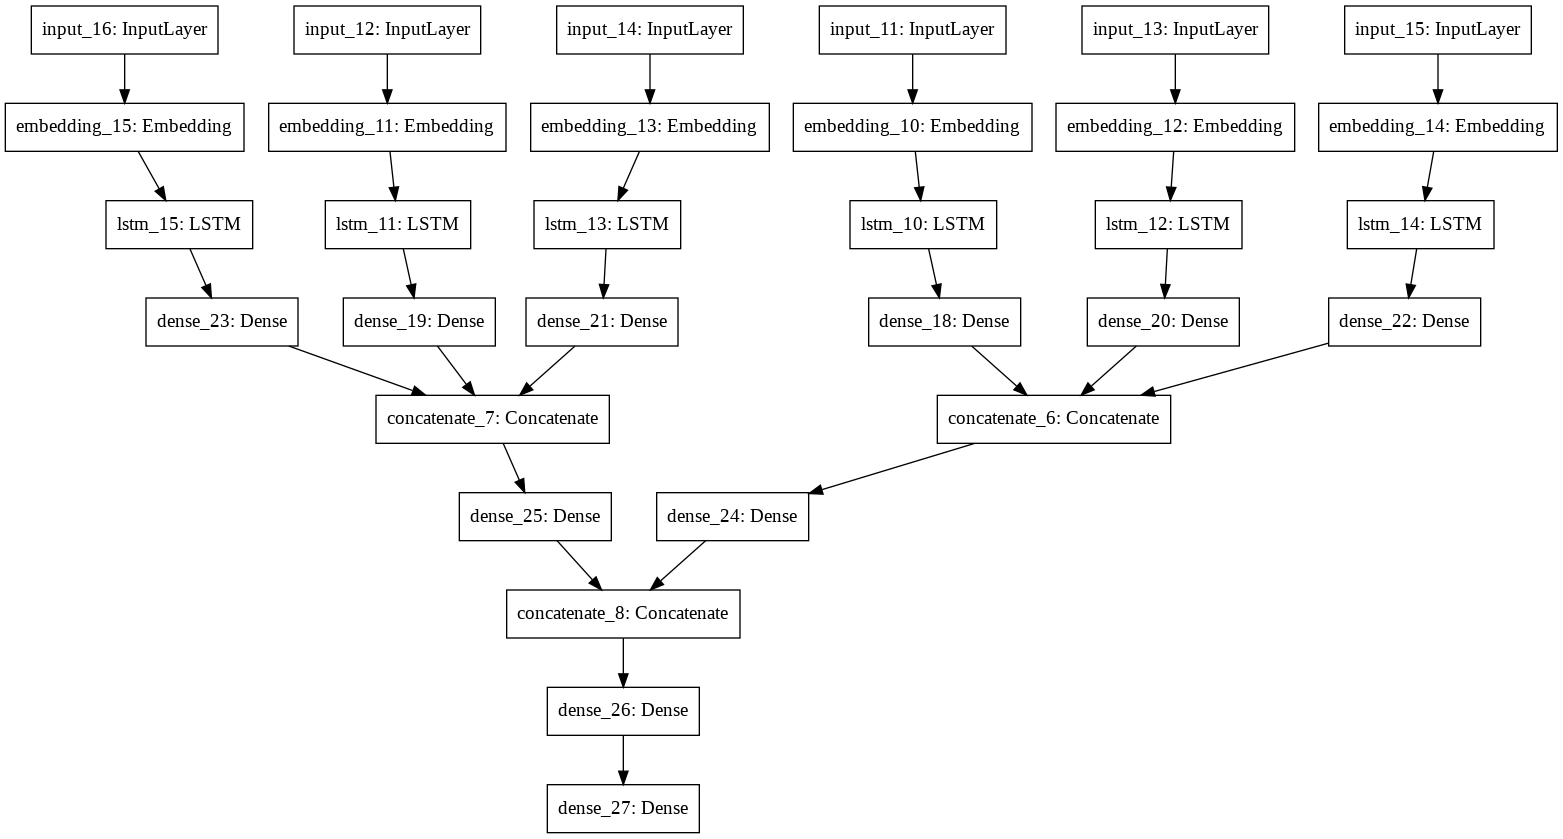

In [ ]:
input_1 = Input(shape=(64,))
input_2 = Input(shape=(64,))

input_3 = Input(shape=(10,))
input_4 = Input(shape=(10,))

input_5 = Input(shape=(10,))
input_6 = Input(shape=(10,))


embedding_layer1 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
embedding_layer2 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_2)
embedding_layer3 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_3)
embedding_layer4 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_4)
embedding_layer5 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_5)
embedding_layer6 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_6)

LSTM_Layer_1 = LSTM(128)(embedding_layer1)
LSTM_Layer_2 = LSTM(128)(embedding_layer2)
LSTM_Layer_3 = LSTM(128)(embedding_layer3)
LSTM_Layer_4 = LSTM(128)(embedding_layer4)
LSTM_Layer_5 = LSTM(128)(embedding_layer5)
LSTM_Layer_6 = LSTM(128)(embedding_layer6)


dense_layer_1 = Dense(64, activation='relu')(LSTM_Layer_1)
dense_layer_2 = Dense(64, activation='relu')(LSTM_Layer_2)
dense_layer_3 = Dense(32, activation='relu')(LSTM_Layer_3)
dense_layer_4 = Dense(32, activation='relu')(LSTM_Layer_4)
dense_layer_5 = Dense(32, activation='relu')(LSTM_Layer_5)
dense_layer_6 = Dense(32, activation='relu')(LSTM_Layer_6)

concat_layer1 = Concatenate()([dense_layer_1, dense_layer_3, dense_layer_5])
dense_layer_5 = Dense(32, activation='relu')(concat_layer1)
concat_layer2 = Concatenate()([dense_layer_2, dense_layer_4, dense_layer_6])
dense_layer_6 = Dense(32, activation='relu')(concat_layer2)

concat_layer = Concatenate()([dense_layer_5, dense_layer_6])

dense_layer_7 = Dense(64, activation='relu')(concat_layer)
# dense_layer_8 = Dropout(0.3)(dense_layer_7)
output = Dense(1, activation='sigmoid')(dense_layer_7)
model = Model(inputs=[input_1, input_2, input_3, input_4, input_5, input_6], outputs=output)
# model = Model(inputs=[input_1, input_2], outputs=output)



# input_1 = Input(shape=(150,))

# embedding_layer1 = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)

# LSTM_Layer_1 = LSTM(128)(embedding_layer1)

# dense_layer_1 = Dense(64, activation='relu')(LSTM_Layer_1)

# dense_layer_7 = Dense(10, activation='relu')(dense_layer_1)

# output = Dense(1, activation='sigmoid')(dense_layer_7)

# model = Model(inputs=input_1, outputs=output)
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-1,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

plot_model(model, to_file='model_plot2.png',  show_layer_names=True)


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# vectorizer.fit(df.sentence1)

# from sentence_transformers import SentenceTransformer
# sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
# X_train = sbert_model.encode(X_train)
# X_test  = sbert_model.encode(X_test)



AttributeError: ignored

In [ ]:
zero, one = np.bincount(df.similarity)
total = zero + one
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, one, 100 * one / total))

initial_bias = np.log([one/zero])
initial_bias

Examples:
    Total: 119716
    Positive: 7854 (6.56% of total)



array([-2.65624301])

In [ ]:
from sklearn.utils import compute_class_weight

w = compute_class_weight('balanced', np.unique(y_train), y_train)

class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch == 2:  # or save after some epoch, each k-th epoch etc.
            self.model.save("drive/MyDrive/Colab Notebooks/saved_models/model_{}.hd5".format(epoch))

# here I am adding only two categories with their corresponding weights
# you can spin a loop or continue by hand until you include all of your categories
weights = {
     np.unique(y_train)[0] : w[0], # class 0 with weight 0
     np.unique(y_train)[1] : w[1]  # class 1 with weight 1 
}

# weight_for_0 = (1 / zero)*(total)/2.0 
# weight_for_1 = (1 / one)*(total)/2.0

# class_weight = {0: weight_for_0, 1: weight_for_1}
# weights
# class_weight
# le = LabelEncoder()
# le.fit(y_train)
# y_train = le.transform(y_train)
# y_test = le.transform(y_test)
saver = CustomSaver()
checkpoint = keras.callbacks.ModelCheckpoint('drive/MyDrive/Colab Notebooks/saved_models/model{epoch:08d}.h5', period=2) 
history = model.fit([X_train1, X_train2, X_train3, X_train4, X_train5, X_train6], y_train,
                    epochs=20,
                    verbose=True,
                    batch_size=64,
                    class_weight=weights,
                    callbacks = [checkpoint] )

# history = model.fit([X_train1, X_train2], y_train,
#                     epochs=20,
#                     verbose=True,
#                     batch_size=25)


# history = model.fit(X_train, train_df['class'],
#                     epochs=20,
#                     verbose=True,
#                     batch_size=30)

# model.save("drive/MyDrive/Colab Notebooks/coref_model.h5")

# preds = model.predict([X_test1, X_test2, X_test3, X_test4])

# preds = model.predict([X_test1, X_test2])

# preds = model.predict(X_test)
# preds = [1 if p > 0.5 else 0 for p in preds]
# print(classification_report(y_test, preds))




Epoch 1/40
3500/3500 [==============================] - 632s 177ms/step - loss: 0.3931 - acc: 0.8745
Epoch 2/40
3500/3500 [==============================] - 621s 177ms/step - loss: 0.3395 - acc: 0.8598
Epoch 3/40
3500/3500 [==============================] - 605s 173ms/step - loss: 0.3328 - acc: 0.8931
Epoch 4/40
3500/3500 [==============================] - 611s 175ms/step - loss: 0.3221 - acc: 0.9086
Epoch 5/40
3500/3500 [==============================] - 615s 176ms/step - loss: 0.3192 - acc: 0.8304
Epoch 6/40
3500/3500 [==============================] - 615s 176ms/step - loss: 0.2813 - acc: 0.8149
Epoch 7/40
3500/3500 [==============================] - 609s 174ms/step - loss: 0.2638 - acc: 0.8271
Epoch 8/40
3500/3500 [==============================] - 611s 175ms/step - loss: 0.2596 - acc: 0.8212
Epoch 9/40
3500/3500 [==============================] - 635s 181ms/step - loss: 0.2471 - acc: 0.8325
Epoch 10/40
3500/3500 [==============================] - 641s 183ms/step - loss: 0.2417 - a

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

x_t = np.hstack([X_train1, X_train2, X_train3, X_train4])
svclassifier.fit(x_t, y_train)

# X_train1.shape, X_train3.shape

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model = keras.models.load_model('drive/MyDrive/Colab Notebooks/saved_models/model00000060.h5')

In [ ]:
preds = model.predict([X_test1, X_test2, X_test3, X_test4, X_test5, X_test6])
# preds = model.predict([X_train1, X_train2, X_train3, X_train4])

# preds = model.predict([X_test1, X_test2])

# preds = model.predict(X_test)
preds = [1 if p > 0.5 else 0 for p in preds]
# x_test = np.hstack([X_test1, X_test2, X_test3, X_test4])
# preds = svclassifier.predict(x_test)

In [ ]:
# test_df['class'].tolist()
preds

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2128
           1       0.32      0.95      0.48       122

    accuracy                           0.89      2250
   macro avg       0.66      0.92      0.71      2250
weighted avg       0.96      0.89      0.91      2250



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

# print(classification_report(test_df['class'], preds))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2128
           1       0.36      0.93      0.52       122

    accuracy                           0.91      2250
   macro avg       0.68      0.92      0.74      2250
weighted avg       0.96      0.91      0.93      2250



In [ ]:
y_test.tolist()

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Single list of sentences - Possible tens of thousands of sentences
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

paraphrases = util.paraphrase_mining(model, sentences)


for paraphrase in paraphrases[0:20]:
    score, i, j = paraphrase
    print(sentences[j])
    # print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

In [ ]:
!pip install translate

from translate import Translator
translator= Translator(to_lang="German")
text = "The new movie is so fucking awesome"
translation = translator.translate(text)

reverse_translator = Translator(from_lang='german', to_lang="english")
reverse_translation = reverse_translator.translate(translation)
print("original text: " + text)
print("obfuscated text: " + reverse_translation)

In [ ]:
#deal with tensors
import torch   

#handling text data
from torchtext.legacy import data  

#Reproducing same results
SEED = 2019

#Torch
torch.manual_seed(SEED)

#Cuda algorithms
torch.backends.cudnn.deterministic = True  



In [ ]:
TEXT = data.Field(tokenize='spacy',batch_first=True,include_lengths=True)
LABEL = data.LabelField(dtype = torch.float,batch_first=True)
fields = [(None, None), ('text',TEXT),('label', LABEL)]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['sentence1', 'sentence2', 'tag1', 'tag2']], df.similarity, test_size=0.25, random_state=1000)

In [ ]:
#initialize glove embeddings
TEXT.build_vocab([X_train.sentence1.to_list()],min_freq=3,vectors = "glove.6B.100d")  
LABEL.build_vocab([X_train.sentence1+X_train.sentence2])

#No. of unique tokens in text
print("Size of TEXT vocabulary:",len(TEXT.vocab))

#No. of unique tokens in label
print("Size of LABEL vocabulary:",len(LABEL.vocab))

#Commonly used words
print(TEXT.vocab.freqs.most_common(10))  

#Word dictionary
print(TEXT.vocab.stoi)   

Size of TEXT vocabulary: 348
Size of LABEL vocabulary: 22669
[('in as many parts as there are corresponding pairs of buoyant chambers, so that by coupling the sections of the shaft together, the whole of Page 35From Nicolay and Hay, Abraham Lincoln A History the chambers can be expanded at the same time, and by disconnecting them, either pair of chambers can be expanded, separately from the others as circumstances may require', 98), ('are connected to the main shaft C, which passes longitudinally through the centre of the vessel just below its upper deck, by endless ropes f', 90), ('is a longitud i nal vertical section through the centre of one of the buoyant chambers, and the box B', 89), ('For the benefit of those who are like the speaker, always misrepresenting the Free Soil Party, I will define our position in a prosyllogism', 88), ('e,e, are check ropes made fast to the tops of the boxes B, B, and to the upper sides of the buoyant chambers which ropes catch and retain the upper si

In [ ]:
X_train

,sentence1,sentence2,tag1,tag2
2562,"Speaking of Van Buren, he said, he Van Buren w...",He seemed to be entirely ignorant that every p...,"['Van Buren', 'General Taylor', 'Free Soilers'...","['General Taylor', 'Van Buren', 'Free Soilers'..."
26315,"The Speaker then went on to show, clearly and ...",Am I mistaken Very truly Yours A,"['Gen Taylor', 'Mr Lincoln', 'Free Soil', 'Gen...","['Dr Henry', 'Minesota appointment', 'Yours LI..."
24453,why the Taylor faction of the whig party did n...,"Louis, or the lead mines, or the gold mines, i...","['Mr Lincoln', 'free negro', 'Mr McConnel', 'M...","['eighty dollars', 'lead mines', 'best wages',..."
9106,He did not know that General Taylor had profes...,Lincoln then passed to the subject of slavery ...,"['General Taylor', 'Van Buren', 'Free Soilers'...","['Gen Taylor', 'Mr Lincoln', 'Free Soil', 'Gen..."
12402,"Taylor does is not only to consent, but to app...","Van Buren, they had no specific means to preve...","['Gen Taylor', 'Mr Lincoln', 'Free Soil', 'Gen...","['Gen Taylor', 'Mr Lincoln', 'Free Soil', 'Gen..."
...,...,...,...,...
15611,He declared that of all the parties asking the...,for the reception of the buoyant chambers when...,"['Gen Taylor', 'Mr Lincoln', 'Free Soil', 'Gen...","['buoyant chambers', 'main shaft', 'spars D', ..."
3776,Lincoln crouched in silence beneath the blows ...,"McConnel denied the charge, and called on Linc...","['Mr Lincoln', 'Mr McConnel', 'free negro', 'M...","['Mr Lincoln', 'Mr McConnel', 'Mr Polk', 'free..."
6215,being wound several times around the main shaf...,"rising from the buoyant chambers, may be passe...","['buoyant chambers', 'main shaft', 'spars D', ...","['buoyant chambers', 'main shaft', 'boxes B', ..."
4695,If we take these lands said he it will not be ...,"In relation to the fact assumed, that, after a...","['public lands', 'new States', 'Mr LINCOLN', '...","['public lands', 'new States', 'Mr LINCOLN', '..."


In [ ]:
from bs4 import BeautifulSoup
# !pip install google
# !pip install git+https://github.com/abenassi/Google-Search-API
from googlesearch import search
import requests

query = "the second case was reported in Kerala's Alappuzha district in a student who had returned from Wuhan, China."

def google_scrape(url):
    thepage = requests.get(str(url)).text
    soup = BeautifulSoup(thepage, "html.parser")
    return soup.title.text


# for url in search(query, stop=10):
#     a = google_scrape(url)
#     print str(i) + ". " + a
#     print url
#     print " "
#     i += 1

i = 1
my_results_list = []
for url in search(query,        # The query you want to run
                tld = 'com',  # The top level domain
                lang = 'en',  # The language
                num = 10,     # Number of results per page
                start = 0,    # First result to retrieve
                stop = 5,  # Last result to retrieve
                pause = 5.0,  # Lapse between HTTP requests
               ):
    
    # r =0
    r = google_scrape(url)
    # title = everything_between(r.text, '<title>', '</title>')
    my_results_list.append((url, r))
    i +=1 


            

# from googleapi import google
# num_page = 2
# search_results = google.search(query, num_page)

In [ ]:
my_results_list

# r = urllib.request.urlopen('apple.html').read()
# r

[('https://weather.com/en-IN/india/news/news/2020-02-14-kerala-defeats-coronavirus-indias-three-covid-19-patients-successfully',
  'Kerala Defeats Coronavirus; India’s Three COVID-19 Patients Successfully Recover | The Weather Channel - Articles from The Weather Channel | weather.com'),
 ('https://www.newindianexpress.com/good-news/2021/feb/14/meet-vasanthi-lara-the-covid-warrior-from-keralas-alappuzha-2263819.html',
  'ERROR: The request could not be satisfied'),
 ('https://www.indiatoday.in/india/story/coronavirus-in-india-tracking-country-s-first-50-covid-19-cases-what-numbers-tell-1654468-2020-03-12',
  "Coronavirus in India: Tracking country's first 50 COVID-19 cases; what numbers tell - India News"),
 ('https://www.thehindu.com/news/national/second-case-of-coronavirus-confirmed-in-kerala/article30718320.ece',
  '\nSecond case of coronavirus confirmed in Kerala - The Hindu\n'),
 ('https://en.wikipedia.org/wiki/Timeline_of_the_COVID-19_pandemic_in_Kerala',
  'Timeline of the COVID-

In [ ]:
!pip install google

In [ ]:
import spacy
import neuralcoref

# nlp = spacy.load('en')

# # Let's try before using the conversion dictionary:
# neuralcoref.add_to_pipe(nlp)
# doc = nlp(u'Deepika has a dog. She loves him. The movie star has always been fond of animals')
# doc._.coref_clusters
# doc._.coref_resolved

AttributeError: ignored